In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
df = pd.concat([df,pd.get_dummies(df.kitchenqual, prefix="kitchenqual", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(df.kitchenqual, prefix="kitchenqual", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df.street, prefix="street", drop_first=True).columns)

In [5]:
X = df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf']+ dummy_column_names]
Y = df['saleprice']

In [6]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     458.2
Date:                Tue, 07 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:22:38   Log-Likelihood:                -13939.
No. Observations:                1168   AIC:                         2.790e+04
Df Residuals:                    1158   BIC:                         2.795e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3655.9595   1.93e+04     -0.190      0.849   -4.14e+04    3.41e+04
overallqual     1.937e+04   1305.028     14.843      0.000    1.68e+04    2.19e+04
grlivarea         42.5509      2.652     16.045      0.000      37.348      47.754
garagecars      1.589e+04   3328.644      4.774      0.000    9359.405    2.24e+04
garagearea        10.7956     11.198      0.964      0.335     -11.175      32.766
totalbsmtsf       22.5527      3.050      7.393      0.000      16.568      28.538
kitchenqual_Fa -5.761e+04   9075.068     -6.348      0.000   -7.54e+04   -3.98e+04
kitchenqual_Gd  -4.51e+04   4816.709     -9.362      0.000   -5.45e+04   -3.56e+04
kitchenqual_TA -5.849e+04   5454.608    -10.724      0.000   -6.92e+04   -4.78e+04
street_Pave    -6439.1133   1.68e+04     -0.384      0.701   -3.93e+04    2.65e+04
==============================================================================
Omnibus:                      482.085   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41553.066
Skew:                          -0.970   Prob(JB):                         0.00
Kurtosis:                      32.156   Cond. No.                     4.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

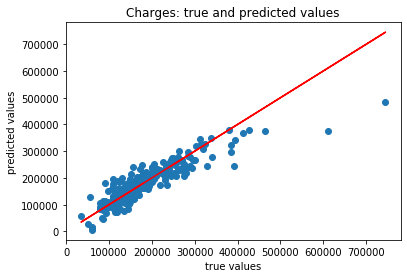

Mean absolute error of the prediction is: 24065.854221487225
Mean squared error of the prediction is: 1357369691.210516
Root mean squared error of the prediction is: 36842.49843876655
Mean absolute percentage error of the prediction is: 14.768658931336335


In [7]:
# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [9]:
X = df[['overallqual', 'grlivarea', 'garagecars','totalbsmtsf','kitchenqual_Fa', 'kitchenqual_Gd','kitchenqual_TA']]
Y = np.log1p(df['saleprice'])

In [10]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     660.0
Date:                Tue, 07 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:25:16   Log-Likelihood:                 359.69
No. Observations:                1168   AIC:                            -703.4
Df Residuals:                    1160   BIC:                            -662.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.8281      0.047    229.698      0.000      10.736      10.921
overallqual        0.1108      0.006     17.714      0.000       0.099       0.123
grlivarea          0.0002   1.27e-05     15.421      0.000       0.000       0.000
garagecars         0.1075      0.009     11.534      0.000       0.089       0.126
totalbsmtsf        0.0001   1.44e-05      8.402      0.000    9.24e-05       0.000
kitchenqual_Fa    -0.2272      0.044     -5.205      0.000      -0.313      -0.142
kitchenqual_Gd    -0.0493      0.023     -2.128      0.034      -0.095      -0.004
kitchenqual_TA    -0.1388      0.026     -5.293      0.000      -0.190      -0.087
==============================================================================
Omnibus:                      718.412   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18470.805
Skew:                          -2.372   Prob(JB):                         0.00
Kurtosis:                      21.895   Cond. No.                     2.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

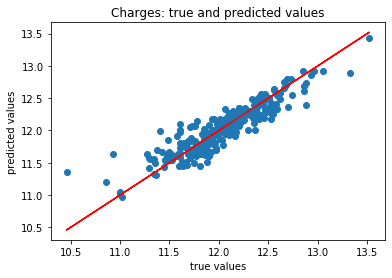

Mean absolute error of the prediction is: 0.12140824105595013
Mean squared error of the prediction is: 0.028365086197499764
Root mean squared error of the prediction is: 0.16841937595627102
Mean absolute percentage error of the prediction is: 1.0171959485703534


In [13]:
# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
since the lower for every metric is desired to 